# Pràctica 1: Resolem un problema de classificacio

## Objectius

Els objectius d'aquesta pràctica són:

* Aplicar els coneixements adquirits sobre classificacio, tecniques d'emplenats de nans i validacio creuada.
  
* Ser capac de comparar diferents models classificacio

* Ser capac de fer busca d'hiperparametres.

* Entendre i implamentar la validacio creuada

* Analitzar detalladament els resultats obtinguts durant l'aprenentatge dels diferents models.

Aquesta practica es previa al cas kaggle que realitzareu durant la segona part de l'assignatura. En aquesta primera practica les preguntes estan definides, pero us ha de servir d'aprenentatge alhora de saber com estructurar un projecte d'aprenentatge automatic ja que en el cas kaggle no tindreu les preguntes.

## Bases de dades

En aquesta practica farem servir la base de dades del titanic. L'atribut que predirem es Survived, el qual ens diu si va sobreviure o no cada passatger.


https://www.kaggle.com/c/titanic/data


##Treball en grup
Aquesta practica es treballara en grups de 2-3 persones. En casos excepcionals i degudament justificats la practica es podra realitzar de forma individual.
## Seguiment i entrega de la pràctica

En la pràctica 1, es presenten diverses tasques per fer una correcta comparativa dels resultats obtinguts per diversos mètodes de classificació numèrica en una mateixa base de dades.


En aquesta practica es realitzara sessions de seguiment del treball. Aquestes sessions de treball està orientada a que els alumnes que vingueu pugueu preguntar i resoldre dubtes sobre les dades, preguntar sobre l'objectiu de cada apartat dels enunciats que no us hagi quedat clar, i preguntar sobre els resultats que esteu obtenint a l'hora d'analitzar les dades. Es molt recomanable venir amb el treball fet a clase per tal de poder comentar dubtes.

Pel que fa l'entrega, caldra entregar per caronte el seguent:

1. Memòria en format PDF o en la mateixa notebook explicant els resultats trobats sobre la bases de dades amb el respectiu codi de python. Aquesta nota es la mateixa per tots els membres del grup (9 pts)

2. Presentació amb els resultats 4 min màxim. Aquesta nota es individual. (1 pt)

Nota: En cas d'entregar la memoria com a PDF, caldra entregar el codi de python a part. Si s'entrega com a notebook, la mateixa notebook servira com a codi.



# Descripcio de la pràctica

A continuacio es mostren tots els continguts que s'evaluara en la pràctica:

1. EDA (exploratory data analysis) (1 punts):
  * Analisi de tamany i tipologia de dades ( 0.25 pt)
  * Primera valoracio de correlacions ( 0.5 pt)
  * Analisi atribut target ( 0.25 pt)
2. Preprocessing (2 punts):
  * Eliminacio de nans (0.5 punts)
  * Encoding de categoriques (0.75 punts)
  * Altres (PCA, normalitzacio..)
3. Metric selection (1.5 punts):
  * Seleccio de la millor metrica pel problema (0.75 punts)
  * Visualitzacio de ROC/AUC (0.75 punts)
4. Model Selection amb Crossvalidation (4 punts):
  * Seleccio del millor model (2 punts)
  * Busqueda hiperparametres (2 punts)
5. Analisi final (1.5 punt)

Cal dir que, les puntuacions dins de cada apartat son orientatives. La pràctica esta construida a partir d'un seguit de preguntes orientatives en cada apartat les quals tenen relacio amb els continguts evaluables. **NO cal contestar-les totes**. Són una guia per a que reflexioneu i aprengueu detalls de cada apartat.  Es recomanable, aixo si, llegir totes les preguntes abans de realitzar la practica i tenir-les en ment alhora d'executar-la.


**IMPORTANT**: El que es valorara en la practica es la capacitat de mantenir una narrativa coherent alhora que es realitzen els resultats. No es mirara tant que alguna pregunta quedi per respondre sino que els passos seguits en base als resultats obtinguts siguin coherents.

### 1. EDA (exploratory data analysis) (1 punt)

Abans de resm cal sempre veure com es la base de dades asignada?

**Preguntes:**
* Quants atributs té la vostra base de dades? 12
* Quin tipus d'atributs tens? (Númerics, temporals, categorics, binaris...) numerics,categorics
* Com es el target, quantes categories diferents existeixen? binari
* Tenim nans en les dades? SI
* Podeu veure alguna correlació entre X i y?
* Estan balancejades les etiquetes (distribució similar entre categories)? Creus que pot afectar a la classificació la seva distribució? Hi ha un 38% de persones que no han sobreviscut per tant no estan balancejades


In [80]:
#Importem la regressio lineal aixi com pandas i numpy
!pip install pandas
import pandas as pd


import numpy as np
!pip install sklearn
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [81]:
path = 'C:/Users/eloim/OneDrive/Escritorio/3 er carrera/apc/APC_Practica_1_2024.ipynb (2)/train.csv'
df = pd.read_csv(path)

In [82]:
#Mirem rapid el dataset
print (df.keys())
#Mirem els tipus de les columnes
print (df.dtypes)
#Mirem el tamany
print (df.size)

#Mirem descripcio general
print (df.describe())
df.head()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
10692
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.0

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
missing_values=df.isnull().sum() #Per mirar si hi ha nans
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [84]:
survived=df["Survived"].sum() #Mirem si  estan balancejades
print(survived)
percentatge=(survived/len(df))*100
print(percentatge)


342
38.38383838383838


In [85]:
#Canviem les variables categòriques
#Fem label encoder de les variables categoriques (ho veurem en la notebook de encoders i nans mes endevant)
numeric_features = df.select_dtypes(np.number).keys()
non_numeric = [k for k in df.keys() if k not in numeric_features]

1 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [86]:
from sklearn.preprocessing import LabelEncoder
df.loc[:,non_numeric] = df.loc[:,non_numeric].apply(LabelEncoder().fit_transform)
print (df.dtypes)
df.head()

PassengerId      int64
Survived         int64
Pclass           int64
Name             int32
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket           int32
Fare           float64
Cabin            int32
Embarked         int32
dtype: object
1 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64


C:\Users\eloim\AppData\Local\Temp\ipykernel_20632\270945315.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,non_numeric] = df.loc[:,non_numeric].apply(LabelEncoder().fit_transform)


### 2. Preprocessing (normalitzation, outlier removal, feature selection..) (2 punts)
Un cop vistes les dades de les que es disposa, cal preparar les dades per als nostres algoritmes. Segons la tipologia de dades, es poden filtrar atributs, aplicar-hi reductors de dimensionalitat, codificar categories textuals en valors numèrics, normalitzar les dades, treure outliers...

Navegueu per la [documentació de sklearn sobre preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html) per tal de trobar les diferents opcions que proporciona sklearn.

**Preguntes:**
* Estàn les dades normalitzades? Caldria fer-ho? No estan normalitzades degut a que si per exemple mirem l'edat no està entre 0 i 1 per tant caldria.
*NORMALITZAREM: Només es poden normalitzar els atributs edat i fare.
-
* 
* En cas que les normalitzeu, quin tipus de normalització será més adient per les vostres dades? 
* Teniu gaires dades sense informació (nans)? Tingueu en compte que hi ha metodes que no els toleren durant el aprenentatge. Com afecta a la classificació si les filtrem? I si les reompliu? Com ho farieu? [Pista](https://scikit-learn.org/stable/modules/impute.html)
* Teniu dades categoriques? Quina seria la codificació amb més sentit?
* Podreu treure algun atribut extra de les categoriques (per exemple, aplicant alguna regla sobre el text)?
* Caldria aplicar PCA? Quins beneficis o inconvenients trobarieu?
Tot i que podria ser una bona solució per reduir la complexitat i la dimensionalitat de les dades, creiem que és molt més important pel desenvolupament del treball entrendre el significat semàntic d'aquestes per així poder proporcionar un millor anàlisi posterior. En aquest cas, creiem que és més convenient l'eliminació de columnes com "Name", "Ticket" i "Cabin" ja que no ens aporten cap informació rellevant. 
* Caldria aplicar alguna tecnica de seleccio de features? Ho trobeu necessari? 
Sí. En el nostre cas, com ja hem mencionat anteriorment, com es pot veure a simple vista, les variables "Name" i "Ticket" tenen una alta correlació amb la variable "Passenger_Id", per tant seria un bon filter method per eliminar-les. Emprant mètodes com Lasso i Ridge podríem concloure quines altres característiques son irrellevants (com més petit el coeficient més irrelevant és). (CABIN)
* Es poden aplicar PolynomialFeatures per millorar la classificació? En quins models té sentit fer-ho?

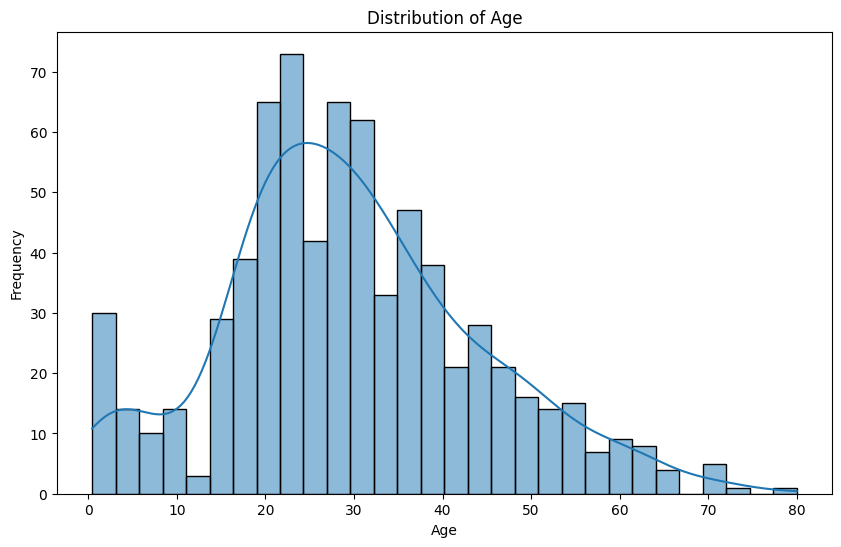

In [77]:
!pip install seaborn
import seaborn as sns

import matplotlib.pyplot as plt

# Plot the distribution of the 'Age' feature
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [78]:
mitjana_classe=df.groupby(["Pclass"])["Age"]
mitjana_sexe=df.groupby(["Sex"])["Age"]

age_by_gender=df.groupby(["Sex","Pclass"])["Age"]
age_by_gender_survived=df.groupby(["Sex","Pclass","Survived"])["Age"]

print(age_by_gender.mean(), age_by_gender_survived.mean())

Sex  Pclass
0    1         34.611765
     2         28.722973
     3         21.750000
1    1         41.281386
     2         30.740707
     3         26.507589
Name: Age, dtype: float64 Sex  Pclass  Survived
0    1       0           25.666667
             1           34.939024
     2       0           36.000000
             1           28.080882
     3       0           23.818182
             1           19.329787
1    1       0           44.581967
             1           36.248000
     2       0           33.369048
             1           16.022000
     3       0           27.255814
             1           22.274211
Name: Age, dtype: float64


In [87]:
from sklearn.impute import KNNImputer

# Seleccionar las columnas relevantes para la imputación
knn_columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age']

# Crear un subconjunto de los datos que contenga las columnas para el KNN
knn_data = df[knn_columns]

# Inicializar el KNN Imputer
imputer = KNNImputer(n_neighbors=5)

# Aplicar la imputación KNN
knn_data_imputed = imputer.fit_transform(knn_data)

# Reemplazar la columna "Age" con los valores imputados
df['Age'] = knn_data_imputed[:, 5]

Sex  Pclass
0    1         34.659404
     2         28.801316
     3         22.823500
1    1         41.606721
     2         31.280833
     3         27.194870
Name: Age, dtype: float64 Sex  Pclass  Survived
0    1       0           25.666667
             1           34.955868
     2       0           36.000000
             1           28.184286
     3       0           24.213667
             1           21.433333
1    1       0           43.957143
             1           37.584889
     2       0           33.591209
             1           18.913529
     3       0           27.807000
             1           23.287660
Name: Age, dtype: float64


In [88]:
from sklearn.preprocessing import StandardScaler

# Inicializamos el escalador Z-Score
scaler = StandardScaler()

# Seleccionamos las columnas a normalizar
columns_to_normalize = ['Age', 'Fare']

# Aplicamos la normalización Z-Score solo a las columnas seleccionadas
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Mostrar las primeras filas para ver el resultado
print(df[['Age', 'Fare']].head())


        Age      Fare
0 -0.587081 -0.502445
1  0.604731  0.786845
2 -0.289128 -0.488854
3  0.381266  0.420730
4  0.381266 -0.486337


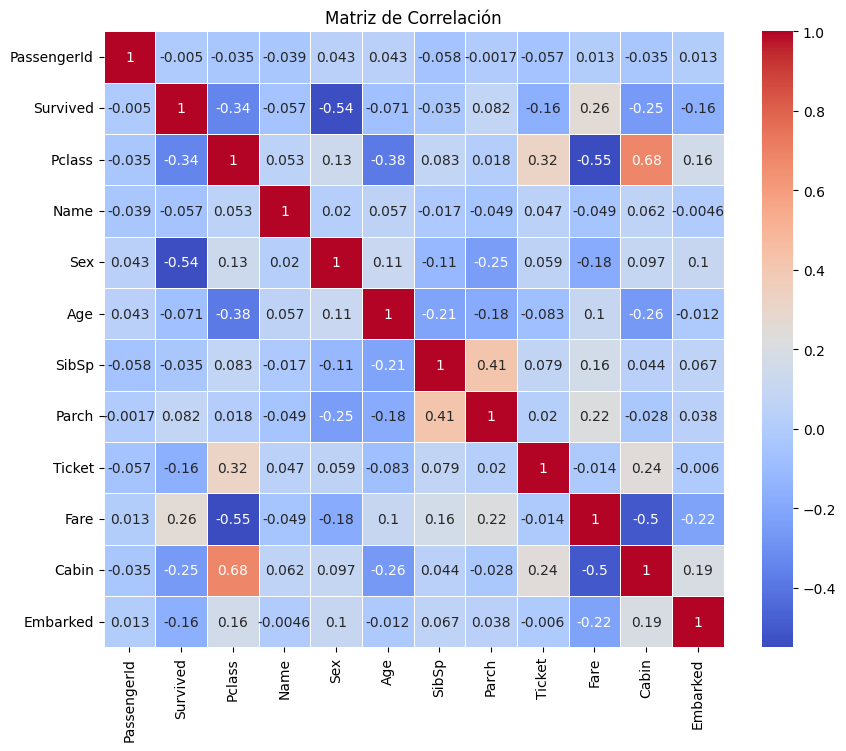

Coeficientes de Lasso:
Sex        -0.464825
Pclass     -0.117671
Age        -0.043422
SibSp      -0.030477
Embarked   -0.027370
Cabin      -0.000610
Ticket     -0.000085
Name       -0.000064
Fare        0.011722
dtype: float64

Coeficientes de Ridge:
Sex        -0.506859
Pclass     -0.145892
Age        -0.060174
Embarked   -0.037302
SibSp      -0.035513
Parch      -0.022801
Cabin      -0.000127
Ticket     -0.000067
Name       -0.000065
Fare        0.018365
dtype: float64


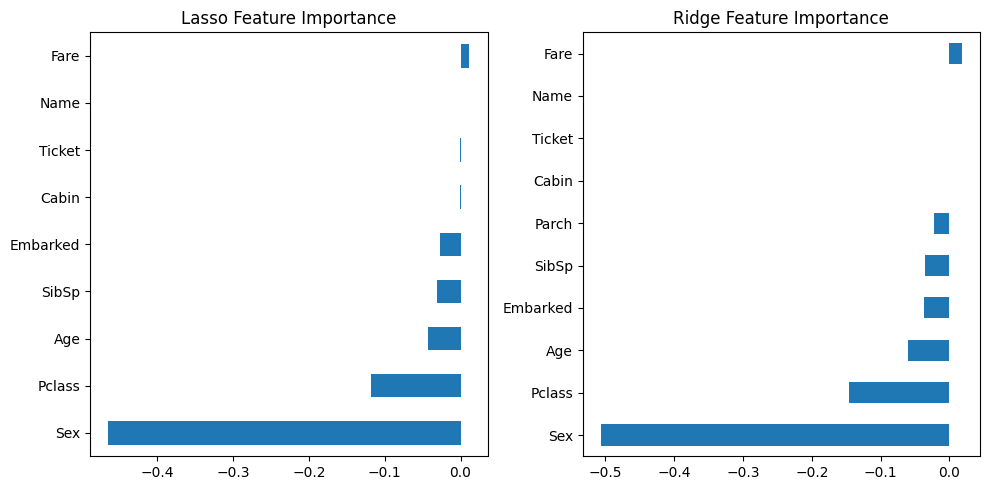

In [90]:
import seaborn as sns
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split

# Supongamos que ya tienes el dataset cargado en 'df'
# Asumimos que ya has hecho cualquier preprocesamiento necesario, como imputación de valores faltantes y estandarización.

# 1. Mostrar la matriz de correlación
def show_correlation_matrix(df):
    plt.figure(figsize=(10, 8))
    corr = df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Matriz de Correlación')
    plt.show()

# Llamamos a la función para mostrar la matriz de correlación
show_correlation_matrix(df)

# 2. Preparar los datos para aplicar Lasso y Ridge

# Variable objetivo (Survived) y características (el resto de columnas excepto PassengerId y Survived)
X = df.drop(['Survived', 'PassengerId'], axis=1)
y = df['Survived']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Aplicar Lasso (L1 Regularization)

# Definimos el modelo de Lasso
lasso = Lasso(alpha=0.01)  # Puedes ajustar alpha para cambiar la penalización
lasso.fit(X_train, y_train)

# Obtenemos los coeficientes de Lasso
lasso_coef = pd.Series(lasso.coef_, index=X.columns)

# Mostramos las características importantes según Lasso
print("Coeficientes de Lasso:")
print(lasso_coef[lasso_coef != 0].sort_values())

# 4. Aplicar Ridge (L2 Regularization)

# Definimos el modelo de Ridge
ridge = Ridge(alpha=1.0)  # Puedes ajustar alpha para cambiar la penalización
ridge.fit(X_train, y_train)

# Obtenemos los coeficientes de Ridge
ridge_coef = pd.Series(ridge.coef_, index=X.columns)

# Mostramos las características importantes según Ridge
print("\nCoeficientes de Ridge:")
print(ridge_coef.sort_values())

# Opcional: Si quieres visualizar las características importantes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
lasso_coef[lasso_coef != 0].sort_values().plot(kind='barh')
plt.title('Lasso Feature Importance')

plt.subplot(1, 2, 2)
ridge_coef.sort_values().plot(kind='barh')
plt.title('Ridge Feature Importance')

plt.tight_layout()
plt.show()


### 3. Metric selection (1.5 punts)
En aquest apartat ens centrarem en les mètriques de classificació ([documentació](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)). Per a fer-ho, entreneu una regressio logistica (no cal separar train-test) i a partir d'aquesta generarem una serie de funcions per analitzar els nostres resultats . Aquestes funcions ens serviran mes endevant. Caldra tambe triar la metrica que farem servir despres per triar el millor model.

**Preguntes:**
* A teoria, hem vist el resultat d'aplicar el `accuracy_score` sobre dades no balancejades. Podrieu explicar i justificar quina de les següents mètriques será la més adient pel vostre problema? `accuracy_score`, `f1_score` o `average_precision_score`?
* Abans de comencar a entrenar models, genereu una suite de funcions per poder analitzar graficament com esta anant el vostre model. Mostreu la Precisió-Recall Curve i la ROC Curve. Quina és més rellevant pel vostre dataset? Expliqueu amb les vostres paraules, la diferencia entre una i altre [Pista](https://stats.stackexchange.com/questions/338826/auprc-vs-auc-roc)
* Què mostra [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)? Quina métrica us fixareu per tal de optimitzar-ne la classificació pel vostre cas?

Nota: Fixeu-vos que en aquest apartat NO ES VALOREN ELS RESULTATS. L'unic que es valora es l'eleccio de la metrica de classificacio aixi com saber quin tipus de grafiques fer per analitzar els resultats. Abans de solucionar un problema cal tenir molt clar la metrica d'error que es fara servir, i es una decisio que cal pendre previa a entrenar models

### 4. Model Selection amb validacio creuada (4 punts)

Fent servir la metrica trobada en l'apartat anterior, en aquest apartat caldra seleccionar una serie de models i, fent us de la validacio creuada, seleccionar el millor model amb els seus respectius millors hyperparametres que haurem buscat fent hyperparameter search.

La tasca d'aquesta pràctica s'enmarca dins l'aprenentatge computacional **supervisat**. A sklearn, disposem de varies tècniques [(veure documentació)](https://scikit-learn.org/stable/supervised_learning.html). A les classes de teoria, hem vist varies tècniques, com ara logistic regression, SVM amb diferents kernels, Nearest Neighbour... i tambe coneixeu altres tecniques d'altres cursos, com els arbres de decisio. Ademes, en la classe de problemes hem donat tambe els random forest i els gradient boosting. Per aquest apartat es demana seleccionar **un minim de 4 models** (per exemple, regressio logistica, random forest, KNN, SVM).

**Preguntes:**
* Quins models heu considerat? Perque els heu seleccionat?
* Fent servir validacio creuada, escolliu el millor model (agafant els hiperparamtres per defecte). Recordeu fer servir la metrica utilitzada en l'apartat anterior. Perque es important fer servir validacio creuada? Heu de fer servir algun [tipus de validacio creuada](https://scikit-learn.org/stable/modules/cross_validation.html) en especial?

* Seleccioneu una serie d'hyperparametres a provar per cadascun dels models i realitzeu una cerca d'hyperparametres. Hi ha algun model que creieu que podeu descartar de primeres? Perque?

* Mostreu els resultats en una taula on es mostri el model, els experiments realitzats i els resultats obtinguts (tant en train com en test). Podeu mostrar tambe el temps d'entrenament de cada model.

* Quin tipus de K-fold heu escollit en la seleccio de models? I en la seleccio de models amb hyperparametres? Com afecta al resultat modificar el numero de k (numero de folds) al resultat?

* Quines formes de buscar el millor parametre heu trobat? Són costoses computacionalment parlant? [documentació](https://scikit-learn.org/stable/modules/grid_search.html) Quina heu seleccionat?

* Si disposem de recursos limitats (per exemple, un PC durant 1 hora) quin dels métodes creieu que obtindrà millor resultat final?

* Existeixen altres mètodes de búsqueda més eficients ([scikit-optimize](https://scikit-optimize.github.io/stable/))?

* Opcional : Feu la prova, i amb el model i el metode de crossvalidació escollit, configureu els diferents metodes de búsqueda per a que s'executin durant el mateix temps (i.e. depenent del problema, 0,5h-1 hora). Analitzeu quin ha arribat a una millor solució. (Ajuda: estimeu el temps que trigarà a fer 1 training el vostre model, i aixi trobeu el número de intents que podeu fer en cada cas.)


### 5.Analisi Final (1.5 punt)

Un cop seleccionat el millor model amb els millors hiperparamtres, caldra fer un report final amb els resultats obtinguts.

Preguntes:
* Mostreu les curves ROC/PR (la que hageu escollit en l'apartat 2) i interpreteu els resultats.

* Analitzeu en detall les diferents metriques que trobeu adients i comenteu per sobre com podrieu fer servir aquest model en un futur. Aixo es el que es coneix com un cas d'us.

* Com creieu que es podria millorar el vostre model?